In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Data Handling

In [24]:
Experiment_DF_T_80_20_20 = pd.read_csv("experiment_target80fine20price20.csv", skiprows = 6)
Experiment_DF_50_50_50 = pd.read_csv("experiment_target50fine50price50.csv", skiprows = 6)
Experiment_DF_P_20_20_80 = pd.read_csv("experiment_target20fine20price80.csv", skiprows = 6)
Experiment_DF_F_20_80_20 = pd.read_csv("experiment_target20fine80price20.csv", skiprows = 6)

In [25]:
Experiment_DF_T_80_20_20 = Experiment_DF_T_80_20_20.sort_values(by = ["[step]","[run number]"], ascending=True).reset_index(drop=True)
Experiment_DF_50_50_50 = Experiment_DF_50_50_50.sort_values(by = ["[step]","[run number]"], ascending=True).reset_index(drop=True)
Experiment_DF_P_20_20_80 = Experiment_DF_P_20_20_80.sort_values(by = ["[step]","[run number]"], ascending=True).reset_index(drop=True)
Experiment_DF_F_20_80_20 = Experiment_DF_F_20_80_20.sort_values(by = ["[step]","[run number]"], ascending=True).reset_index(drop=True)

In [26]:
Experiment_DF_T_80_20_20 = Experiment_DF_T_80_20_20.drop(columns = "[run number]")
Experiment_DF_50_50_50 = Experiment_DF_50_50_50.drop(columns = "[run number]")
Experiment_DF_P_20_20_80 = Experiment_DF_P_20_20_80.drop(columns = "[run number]")
Experiment_DF_F_20_80_20 = Experiment_DF_F_20_80_20.drop(columns = "[run number]")

In [27]:
Experiment_DF_T_80_20_20 = Experiment_DF_T_80_20_20.sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)
Experiment_DF_50_50_50 = Experiment_DF_50_50_50.sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)
Experiment_DF_P_20_20_80 = Experiment_DF_P_20_20_80.sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)
Experiment_DF_F_20_80_20 = Experiment_DF_F_20_80_20.sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)

In [28]:
Experiment_DF = pd.concat([Experiment_DF_P_20_20_80, Experiment_DF_50_50_50, Experiment_DF_T_80_20_20, Experiment_DF_F_20_80_20])

In [29]:
Experiment_DF = Experiment_DF.drop(columns = "random-seed")

In [30]:
#filter for the last outcome
Final_Exp_DF_T_80_20_20 = Experiment_DF_T_80_20_20[Experiment_DF_T_80_20_20["[step]"] == Experiment_DF_T_80_20_20["[step]"].max()].sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)
Final_Exp_DF_50_50_50 = Experiment_DF_50_50_50[Experiment_DF_50_50_50["[step]"] == Experiment_DF_50_50_50["[step]"].max()].sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)
Final_Exp_DF_F_20_80_20 = Experiment_DF_F_20_80_20[Experiment_DF_F_20_80_20["[step]"] == Experiment_DF_F_20_80_20["[step]"].max()].sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)
Final_Exp_DF_P_20_20_80 = Experiment_DF_P_20_20_80[Experiment_DF_P_20_20_80["[step]"] == Experiment_DF_P_20_20_80["[step]"].max()].sort_values(by = ["waste-production-knowledge","waste-tax-monthly","[step]","contract-duration"], ascending=True).reset_index(drop=True)

In [31]:
Final_DF = pd.concat([Final_Exp_DF_P_20_20_80, Final_Exp_DF_50_50_50, Final_Exp_DF_T_80_20_20, Final_Exp_DF_F_20_80_20])

In [32]:
Final_DF = Final_DF.drop(columns = "random-seed")

In [33]:
EXP_DF = pd.DataFrame()
for i in range(6):
    x = Experiment_DF.iloc[:,np.r_[0:7,7+i,13+i,19+i,25+i,31+i]].rename(index = str, columns = {Experiment_DF.columns.values[7+i]: "budget-per-household", Experiment_DF.columns.values[13+i]: "recycling-performance", Experiment_DF.columns.values[19+i]: "frequency-of-survey", Experiment_DF.columns.values[25+i]: "number-of-households", Experiment_DF.columns.values[31+i]: "type-of-infrastructure"})
    EXP_DF = EXP_DF.append(x)

In [34]:
EXP_DF = EXP_DF.reset_index(drop=True)

In [35]:
Final_DF.columns.values[36]

'[type-of-infrastructure] of municipality 5'

In [36]:
Final_EXP_DF = pd.DataFrame()
for i in range(6):
    x = Final_DF.iloc[:,np.r_[0:7,7+i,13+i,19+i,25+i,31+i]].rename(index = str, columns = {Experiment_DF.columns.values[7+i]: "budget-per-household", Experiment_DF.columns.values[13+i]: "recycling-performance", Experiment_DF.columns.values[19+i]: "frequency-of-survey", Experiment_DF.columns.values[25+i]: "number-of-households", Experiment_DF.columns.values[31+i]: "type-of-infrastructure"})
    Final_EXP_DF = Final_EXP_DF.append(x)

In [37]:
Final_EXP_DF = Final_EXP_DF.reset_index(drop=True)

## Visualization

### Municipality Waste Budget-per-Household

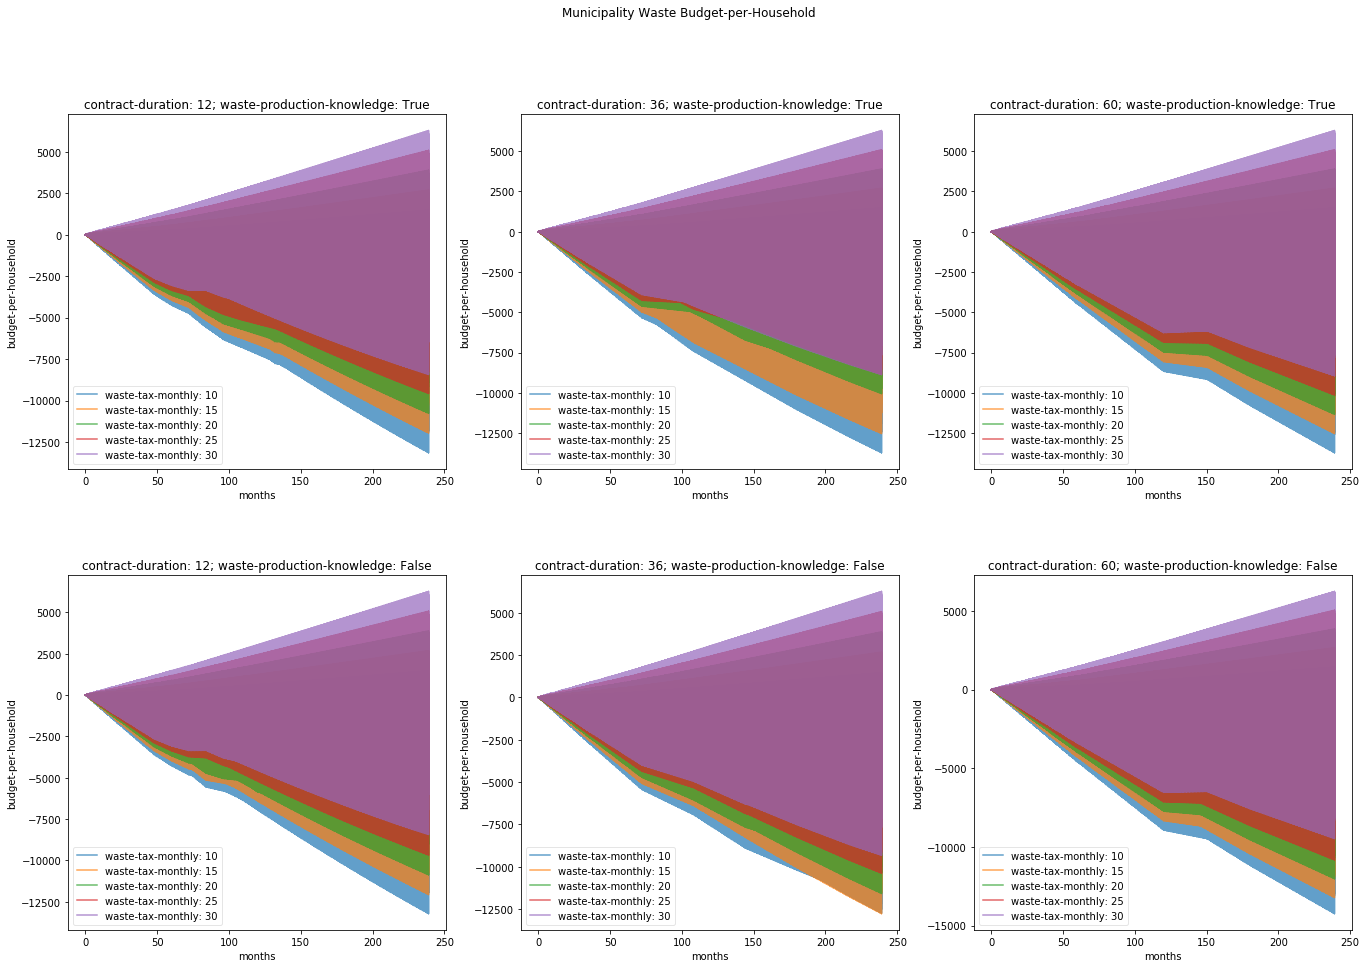

In [38]:
###long-term-contracts + knowledge about reducing waste
fig, axes = plt.subplots(2, 3, sharey=False, figsize=(23,15))
fig.suptitle("Municipality Waste Budget-per-Household")
wpk = [True, False]
cd = [12,36,60]
for i in range (2):
    for j in range (3):
        for k in range(10,35,5):
            df_outcome = EXP_DF[(EXP_DF["waste-tax-monthly"]==k) & (EXP_DF["contract-duration"]==cd[j]) & (EXP_DF["waste-production-knowledge"]==wpk[i])]
            axes[i,j].plot(df_outcome["[step]"], df_outcome[df_outcome.columns.values[7]], label= 'waste-tax-monthly: ' + str(k), alpha=0.7)
            axes[i,j].legend(fancybox=True, framealpha=0.5)
            axes[i,j].set_xlabel("months")
            axes[i,j].set_ylabel(df_outcome.columns.values[7])
            axes[i,j].set_title("contract-duration: " + str(cd[j]) + "; waste-production-knowledge: " + str(wpk[i]))
# Fine-tune figure; make subplots farther from each other.            
fig.subplots_adjust(hspace=0.3)

### Recycling Target

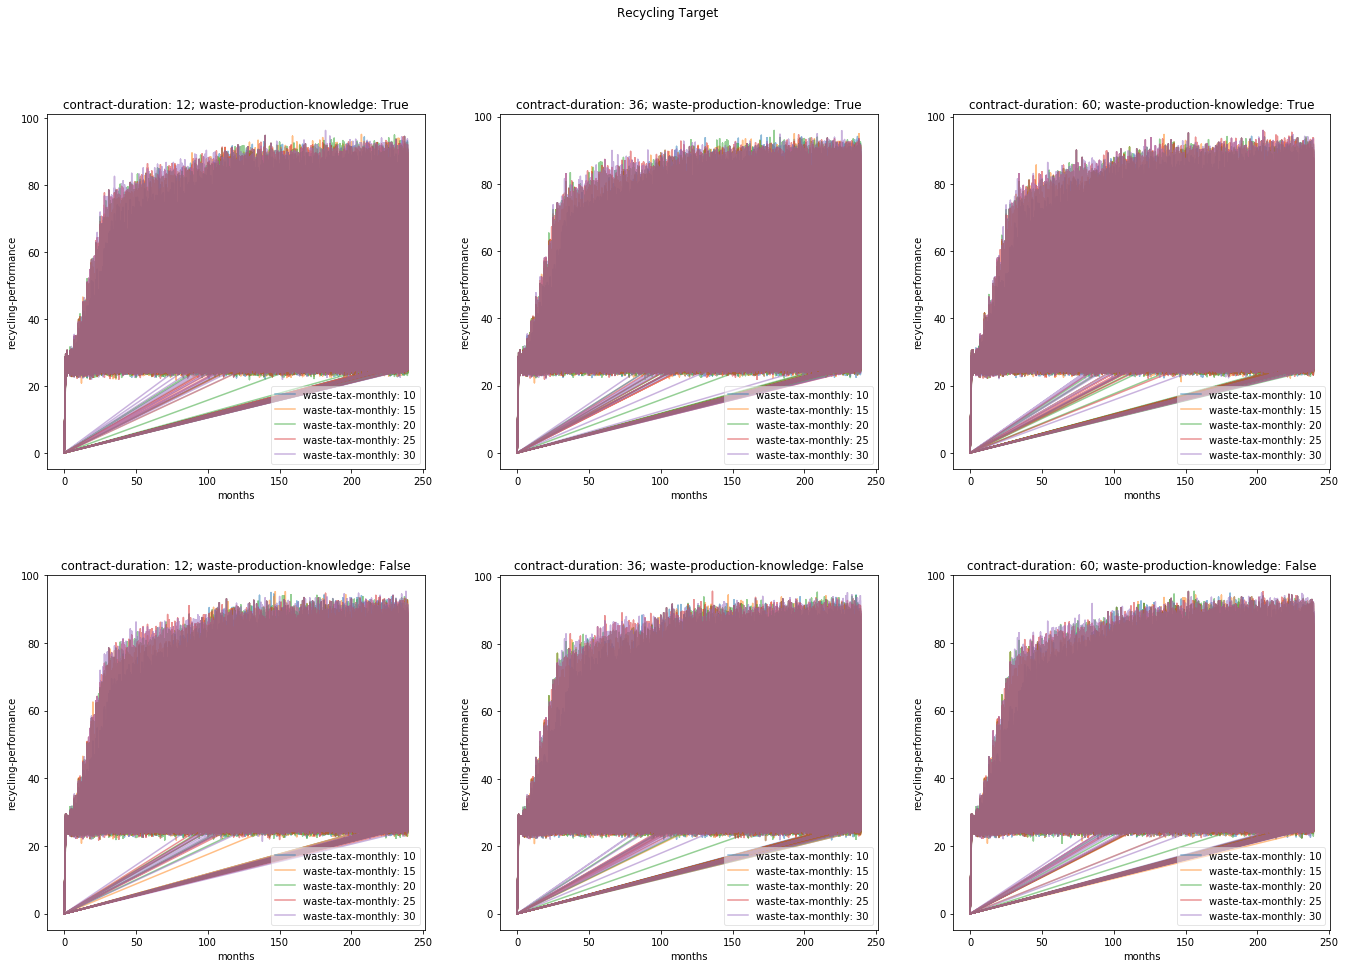

In [39]:
fig, axes = plt.subplots(2, 3, sharey=False, figsize=(23,15))
fig.suptitle("Recycling Target")
wpk = [True, False]
cd = [12,36,60]
for i in range (2):
    for j in range (3):
        for k in range(10,35,5):
            df_outcome = EXP_DF[(EXP_DF["waste-tax-monthly"]==k) & (EXP_DF["contract-duration"]==cd[j]) & (EXP_DF["waste-production-knowledge"]==wpk[i])]
            axes[i,j].plot(df_outcome["[step]"], df_outcome[df_outcome.columns.values[8]], label= 'waste-tax-monthly: ' + str(k), alpha=0.5)
            axes[i,j].legend(fancybox=True, framealpha=0.5)
            axes[i,j].set_xlabel("months")
            axes[i,j].set_ylabel(df_outcome.columns.values[8])
            axes[i,j].set_title("contract-duration: " + str(cd[j]) + "; waste-production-knowledge: " + str(wpk[i]) )
# Fine-tune figure; make subplots farther from each other.            
fig.subplots_adjust(hspace=0.3)

## Scatterplot

In [40]:
Final_EXP_DF.head()

,weight-of-fine,waste-production-knowledge,weight-of-recycling-target,weight-of-price,waste-tax-monthly,contract-duration,[step],budget-per-household,recycling-performance,frequency-of-survey,number-of-households,type-of-infrastructure
0,20,False,20,80,10,12,239,541.268424,63.983934,12,98600,centralized
1,20,False,20,80,10,12,239,-59.379610,25.306791,3,51200,decentralized
2,20,False,20,80,10,12,239,-1507.512352,27.373723,10,113800,centralized
3,20,False,20,80,10,12,239,-3885.729550,26.474451,3,50000,centralized
4,20,False,20,80,10,12,239,-2691.837054,26.210501,4,103200,decentralized


In [41]:
Final_EXP_DF_WTM = Final_EXP_DF.drop(columns = ["weight-of-fine","waste-production-knowledge","weight-of-recycling-target","weight-of-price","contract-duration","[step]"])

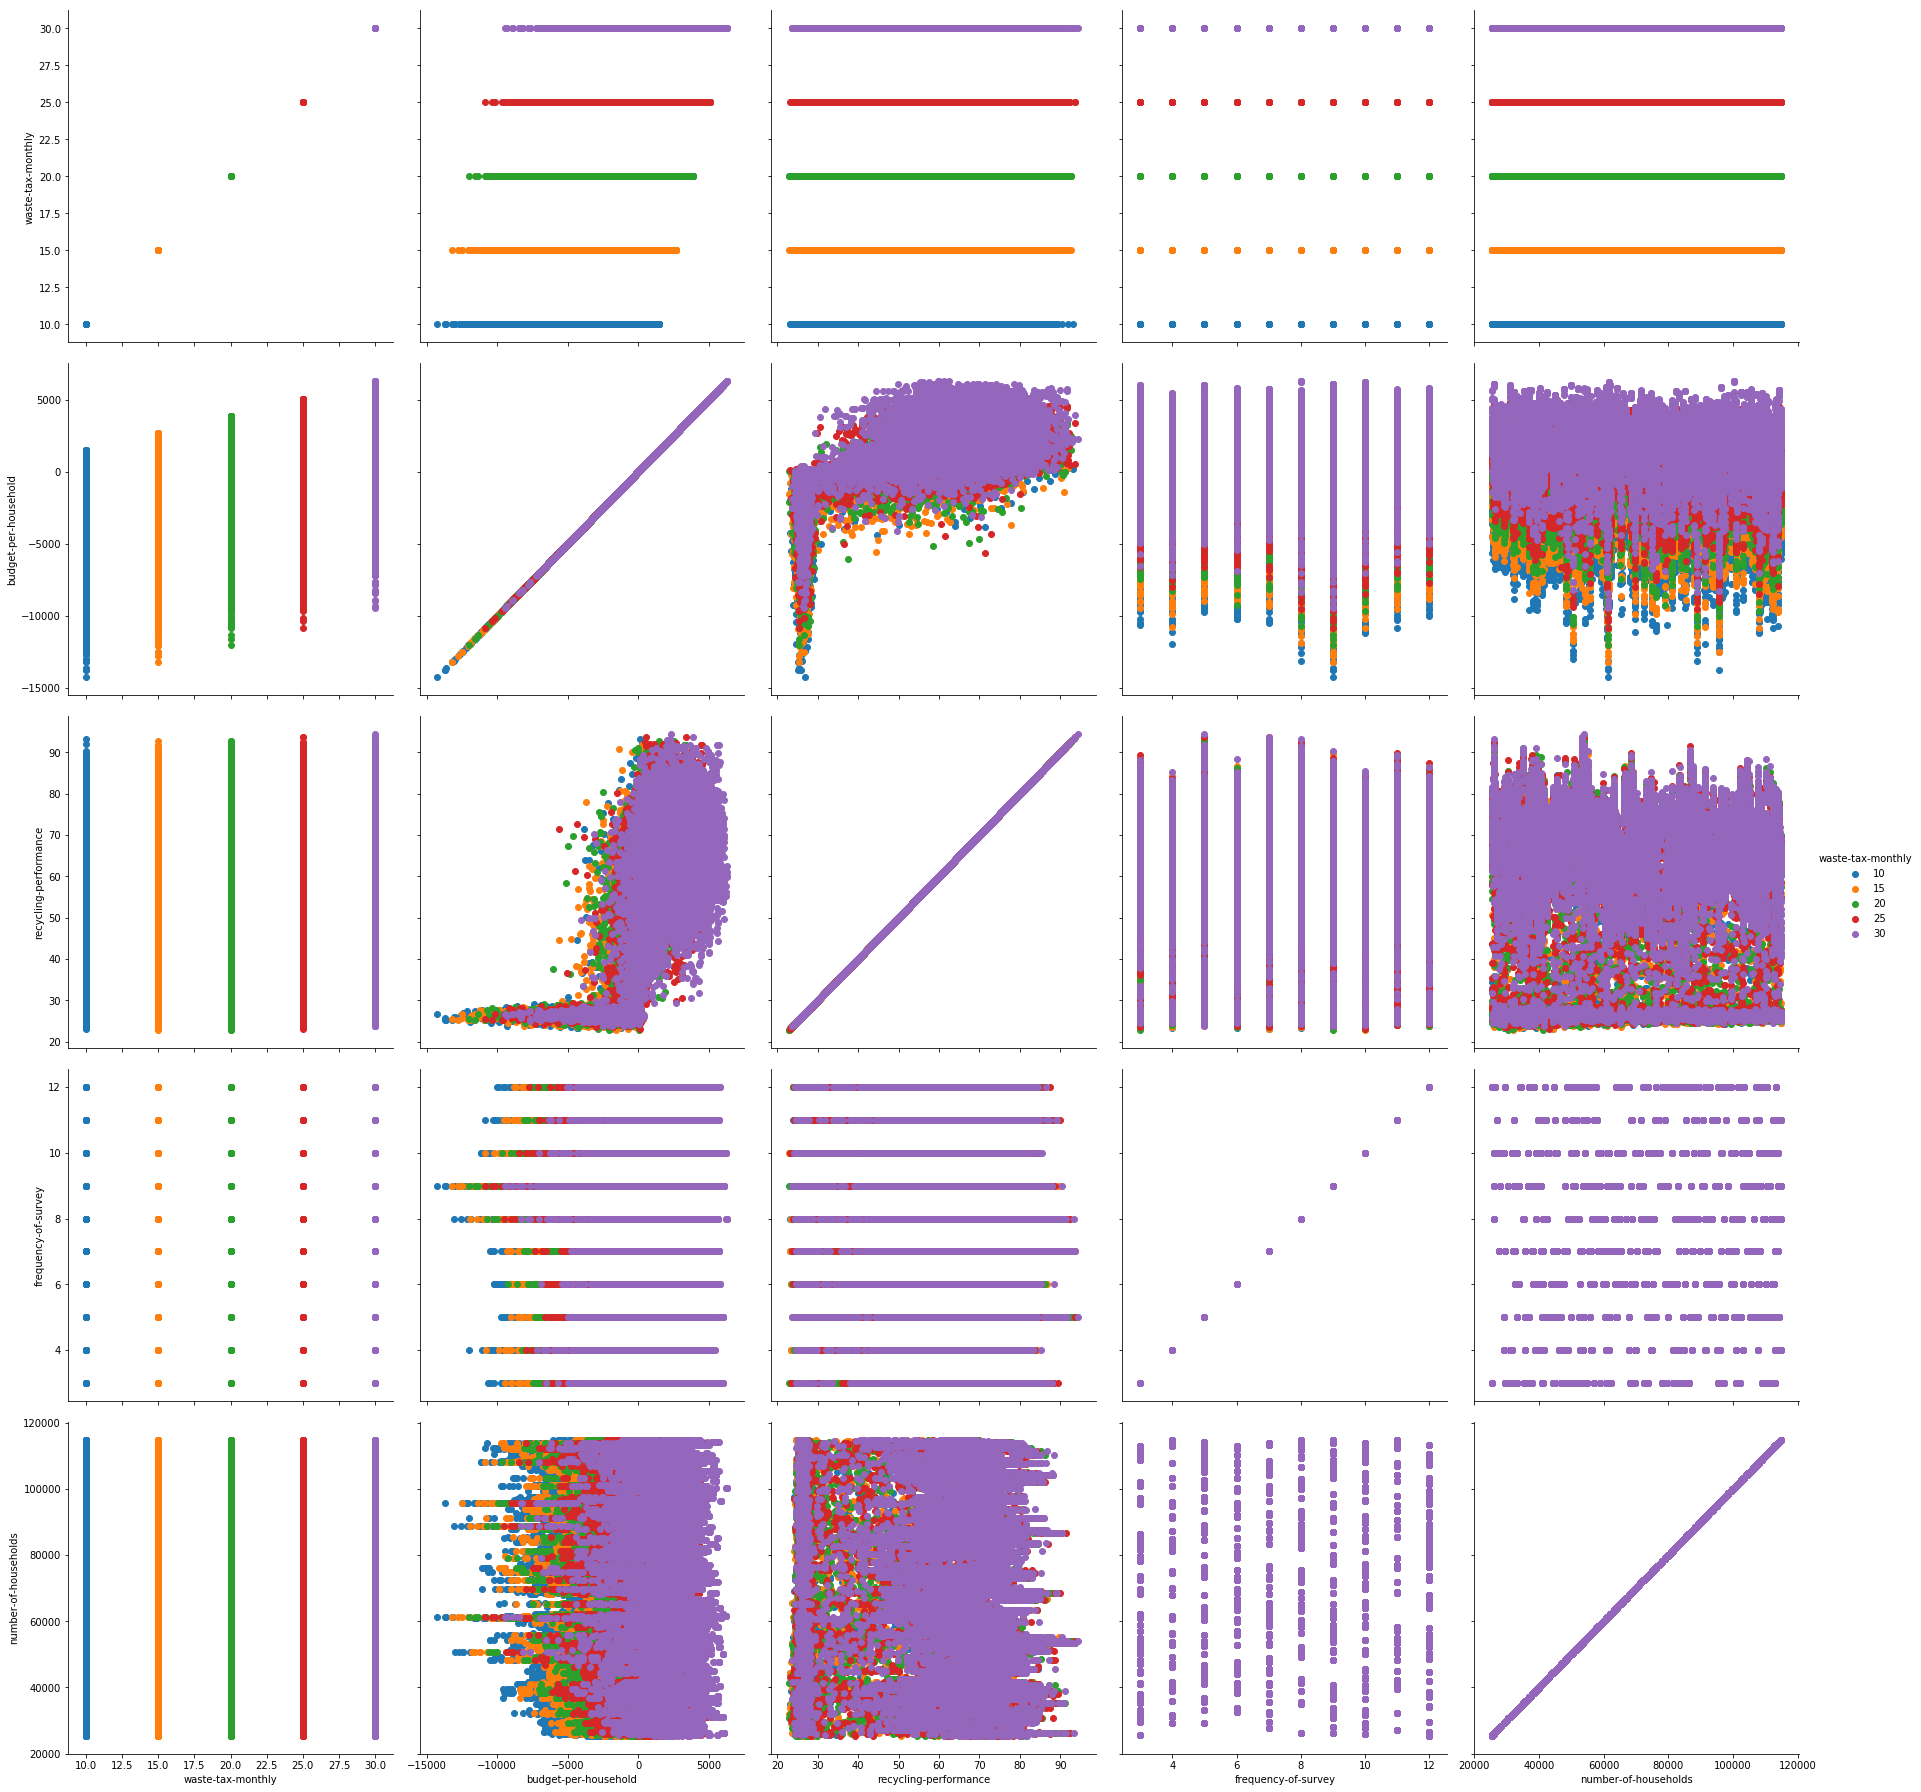

In [42]:
g = sns.PairGrid(Final_EXP_DF_WTM, hue="waste-tax-monthly", height = 5)
g.map(plt.scatter)
g.add_legend()
# g.savefig("Data_exploration_core_perihpery.png")

#### Scatterplots with policy levers as third dimension

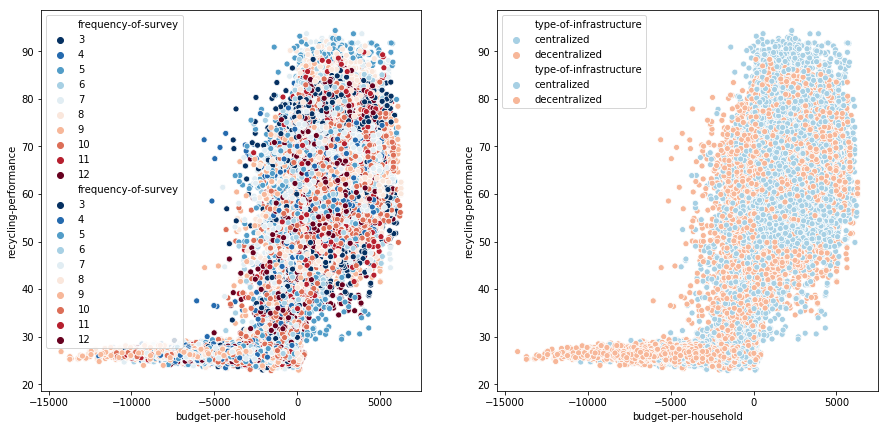

In [49]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(15,7))
for i in range (2):
    sm = sns.scatterplot(x=Final_EXP_DF.columns.values[7], y=Final_EXP_DF.columns.values[8], data = Final_EXP_DF, hue = Final_EXP_DF.columns.values[9], palette='RdBu_r', legend = 'full', ax=axes[0])
    sm = sns.scatterplot(x=Final_EXP_DF.columns.values[7], y=Final_EXP_DF.columns.values[8], data = Final_EXP_DF, hue = Final_EXP_DF.columns.values[11], palette='RdBu_r', legend = 'full', ax=axes[1])
plt.show()

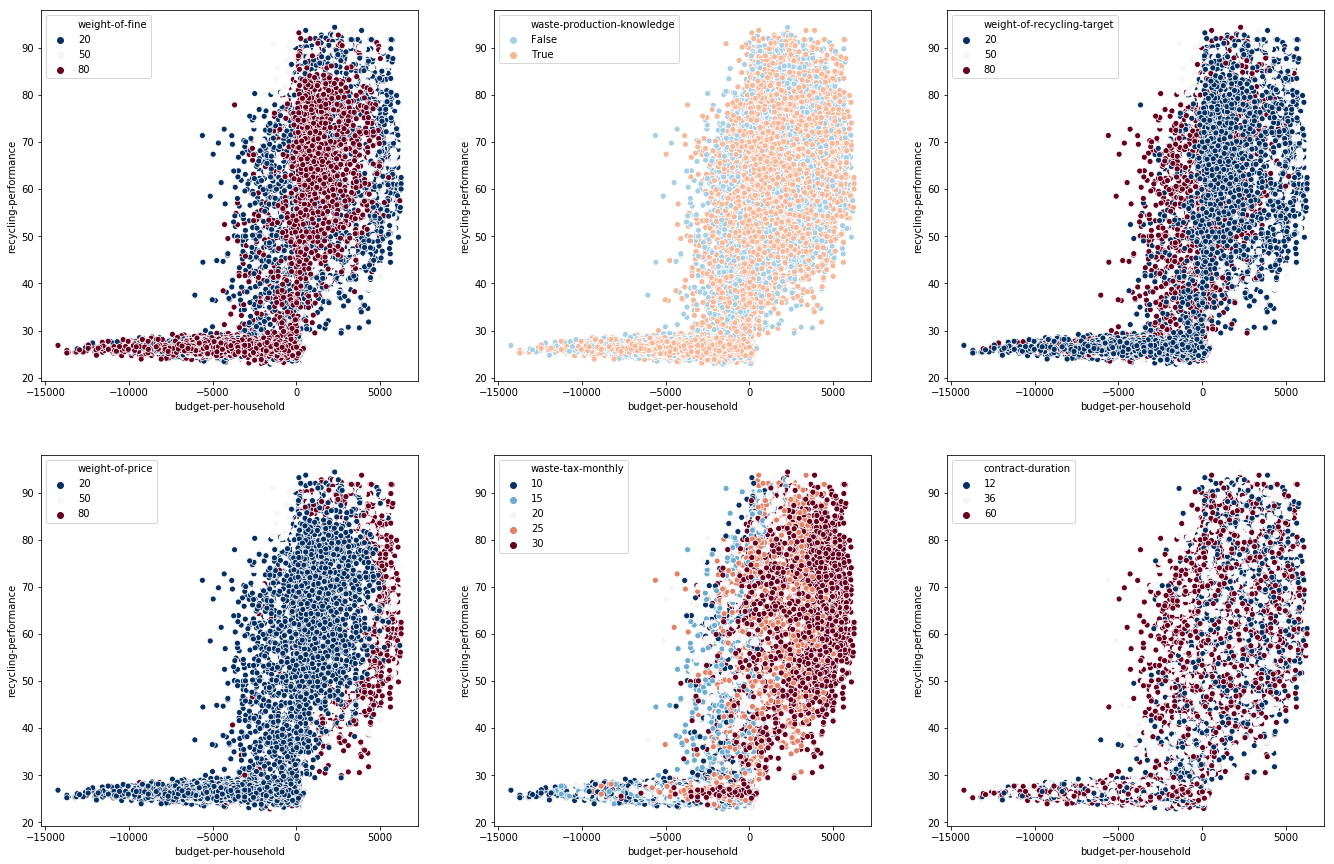

In [46]:
fig, axes = plt.subplots(2, 3, sharey=False, figsize=(23,15))
for i in range (2):
    for j in range (3):
        lm = sns.scatterplot(x=Final_EXP_DF.columns.values[7], y=Final_EXP_DF.columns.values[8], data = Final_EXP_DF, hue = Final_EXP_DF.columns.values[3*i+j], palette='RdBu_r', legend = 'full', ax=axes[i,j])
plt.show()

## Sensitivty Analysis

In [50]:
from ema_workbench.analysis import feature_scoring

C:\Users\Shajee\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:29: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [51]:
Final_EXP_DF.head()

,weight-of-fine,waste-production-knowledge,weight-of-recycling-target,weight-of-price,waste-tax-monthly,contract-duration,[step],budget-per-household,recycling-performance,frequency-of-survey,number-of-households,type-of-infrastructure
0,20,False,20,80,10,12,239,541.268424,63.983934,12,98600,centralized
1,20,False,20,80,10,12,239,-59.379610,25.306791,3,51200,decentralized
2,20,False,20,80,10,12,239,-1507.512352,27.373723,10,113800,centralized
3,20,False,20,80,10,12,239,-3885.729550,26.474451,3,50000,centralized
4,20,False,20,80,10,12,239,-2691.837054,26.210501,4,103200,decentralized


In [52]:
Final_Levers_EXP_DF = Final_EXP_DF.iloc[:,np.r_[0:6,9,11]]
Final_Outcomes_EXP_DF = Final_EXP_DF.iloc[:, 7:9] 

In [53]:
final_levers = Final_Levers_EXP_DF.to_records(index=False)
final_outcomes = {}
for i in range(len(Final_Outcomes_EXP_DF.columns)):
    final_outcomes[Final_Outcomes_EXP_DF.columns.values[i]] = Final_Outcomes_EXP_DF.iloc[:,i].values

In [54]:
#calculating scores
scores = feature_scoring.get_feature_scores_all(final_levers,final_outcomes)

C:\Users\Shajee\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


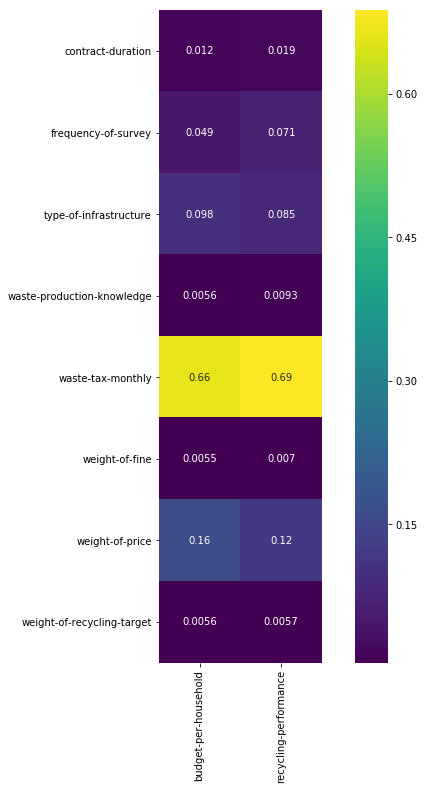

In [55]:
ax = sns.heatmap(scores, cmap="viridis", annot=True)

ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)

plt.show()

In [56]:
Final_Levers_EXP_DF = Final_EXP_DF.iloc[:,np.r_[0:4,5,9,11]]
Final_Outcomes_EXP_DF = Final_EXP_DF.iloc[:, 7:9] 

In [57]:
final_levers = Final_Levers_EXP_DF.to_records(index=False)
final_outcomes = {}
for i in range(len(Final_Outcomes_EXP_DF.columns)):
    final_outcomes[Final_Outcomes_EXP_DF.columns.values[i]] = Final_Outcomes_EXP_DF.iloc[:,i].values

In [58]:
#calculating scores
scores = feature_scoring.get_feature_scores_all(final_levers,final_outcomes)

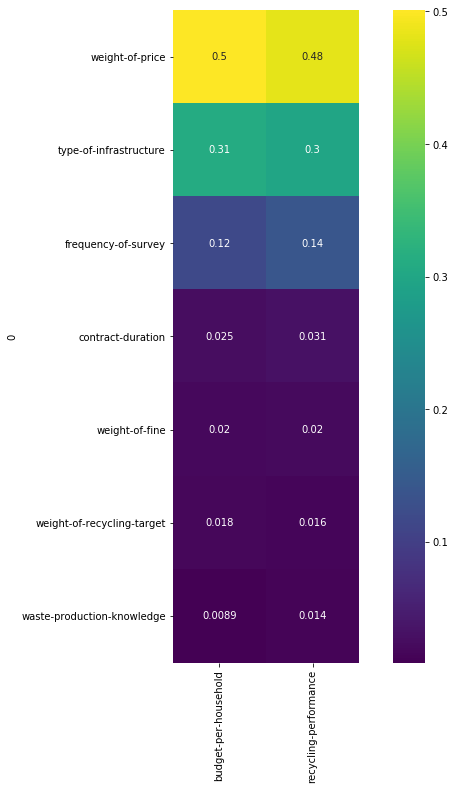

In [59]:
ax = sns.heatmap(scores, cmap="viridis", annot=True)

ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)

plt.show()

## Policy Recommendations

In [66]:
#answering the research questions
Goals_DF = Final_EXP_DF[(Final_EXP_DF["recycling-performance"] >= 60) & (Final_EXP_DF["budget-per-household"] >= 0)]

In [67]:
Goals_DF["waste-tax-monthly"].describe()

count    22273.000000
mean        24.569658
std          5.469803
min         10.000000
25%         20.000000
50%         25.000000
75%         30.000000
max         30.000000
Name: waste-tax-monthly, dtype: float64

In [68]:
Goals_DF["weight-of-price"].describe()

count    22273.000000
mean        49.862614
std         25.659564
min         20.000000
25%         20.000000
50%         50.000000
75%         80.000000
max         80.000000
Name: weight-of-price, dtype: float64

In [69]:
Goals_DF["weight-of-fine"].describe()

count    22273.000000
mean        39.300049
std         23.322479
min         20.000000
25%         20.000000
50%         20.000000
75%         50.000000
max         80.000000
Name: weight-of-fine, dtype: float64

In [70]:
Goals_DF["weight-of-recycling-target"].describe()

count    22273.000000
mean        38.890585
std         23.130228
min         20.000000
25%         20.000000
50%         20.000000
75%         50.000000
max         80.000000
Name: weight-of-recycling-target, dtype: float64

In [71]:
Goals_DF["frequency-of-survey"].describe()

count    22273.000000
mean         7.539757
std          2.909286
min          3.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: frequency-of-survey, dtype: float64

In [72]:
Goals_DF["contract-duration"].describe()

count    22273.000000
mean        35.400889
std         19.636868
min         12.000000
25%         12.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: contract-duration, dtype: float64

In [73]:
Goals_DF["type-of-infrastructure"].describe()

count           22273
unique              2
top       centralized
freq            13801
Name: type-of-infrastructure, dtype: object

In [74]:
Goals_DF["waste-production-knowledge"].describe()

count     22273
unique        2
top        True
freq      11362
Name: waste-production-knowledge, dtype: object